# **Introduction**

“What movie should i watch this evening ?” 

Have you ever had to answer this question at least once when you came home from work? As for me — yes, and more than once. From Netflix to Hulu, the need to build robust movie recommendation systems is extremely important given the huge demand for personalized content of modern consumers.

An example of recommendation system is such as this:

User A watches Game of Thrones and Breaking Bad.
User B does search on Game of Thrones, then the system suggests Breaking Bad from data collected about user A.
Recommendation systems are used not only for movies, but on multiple other products and services like Amazon (Books, Items), Pandora/Spotify (Music), Google (News, Search), YouTube (Videos) etc.

Recommender systems help users select similar items when something is being chosen online. There are several companies that actually use these systems, as such the biggest companies such Netflix or Amazon would suggest to the users movies that might interest. Other companies such as Yelp use recommender systems to suggest different resturants and services. The main point to use these systems is to reach out to users by provider best customer services and improve customer satisfaction.


![](https://i.pinimg.com/originals/d9/58/5e/d9585efc140b5d3689b3341aa5c35df1.jpg)

The current recommendation systems that are bring used and are popular are the content-based filtering and collaborative filtering which works by implementing different information sources to make the recommendations. 

- **Content-based filtering (CBF)** : makes recommendations based on user preferences for product features.
- **Collaborative filtering (CF)** :  mimics user-to-user recommendations (i.e. it relies on how other users have responded to the same items). It predicts users preferences as a linear, weighted combination of other user preferences.

We have to note that both of these methods have **limitations**: The CBF can recommend a new item, but actually needs more data of user preferences in order to give out the best macth. On the other hand, the CF requires large dataset with active users who rated the product before in order to make the most accurate predictions. The combination of both of these methods is known as the hybrid systems.

# **Comet Experiment**

For effective experimentation and version controll we used Comet. Comet, built specifically for Machine Learning, allows us to track changes to our models as we develop, train, and test them. It provides a convenient graphical interface to moniter model performance while tweaking the model, along with the ability to reproduce any logged experiment. Below is a guide on how to use Comet.

In [2]:
pip install comet_ml

Note: you may need to restart the kernel to use updated packages.


In [3]:
"""
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key:
experiment = Experiment(
    api_key="ZBRB8H2ncCGZsUoS6CqVIAr0y",
    project_name="general",
    workspace="knetshiongolwe",
)
"""


COMET INFO: Experiment is live on comet.ml https://www.comet.ml/knetshiongolwe/general/212de816ad8d400eaa5540590cb25b93



# **Table of contents:**
- [Import libraries and datasets](#section-one)
- [Loading data](#section-two)
- [Evaluating Data](#section-three)
- [Data preprocessing](#section-four)
  * [Checking for missing values column wise](#subsection-one)
  * [Checking for duplicates records](#subsection-two)
  * [Create copy](#subsection-three)
  * [Evaluating Length of Unique Values](#subsection-four)
  * [Evaluating unique values for movies](#subsection-four)
  * [Joining Datasets](#subsection-four)
- [Exploratory data analysis](#section-four)
- [Collaborative and Content base filtering](#section-five)
- [content Based Filtering](#section-five)
- [Collaborative Based Filtering](#section-six)
  * [Item-Item based](#subsection-one)
  * [User-User](#subsection-two)
  * [Singular value decomposition](#subsection-three)
- [Model Building](#section-seven)
- [Attempt prediction with altering parameters](#section-eight)
- [Submission](#section-nine)
- [Conclusion](#section-ten)
- [Acknowledgements](#section-eleven)
- [References](#section-twelve)



![](https://i.pinimg.com/originals/be/b9/1c/beb91c4fb913bbb224d5e90c5d497016.gif)

***Let’s get you the best movie!***

<a id="section-one"></a>

# **Import libraries and datasets**

We will be working with the famous Surprise(Simple Python RecommendatIon System Engine.) Library, Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data. 

Below are all libraries that are used through out this notebook.

In [1]:
# data analysis libraries
import pandas as pd
import numpy as np

# Kaggle requirements
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns
from numpy.random import RandomState


#word cloud
%matplotlib inline
import wordcloud

from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
sns.set()

# visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)


# ML Models
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ML Pre processing
from surprise.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Hyperparameter tuning
from surprise.model_selection import GridSearchCV

# High performance hyperparameter tuning
#from tune_sklearn import TuneSearchCV
#import warnings
#warnings.filterwarnings("ignore")

/kaggle/input/edsa-recommender-system-predict/sample_submission.csv
/kaggle/input/edsa-recommender-system-predict/movies.csv
/kaggle/input/edsa-recommender-system-predict/imdb_data.csv
/kaggle/input/edsa-recommender-system-predict/genome_tags.csv
/kaggle/input/edsa-recommender-system-predict/genome_scores.csv
/kaggle/input/edsa-recommender-system-predict/train.csv
/kaggle/input/edsa-recommender-system-predict/test.csv
/kaggle/input/edsa-recommender-system-predict/tags.csv
/kaggle/input/edsa-recommender-system-predict/links.csv


# **Loading data**
<a id="section-two"></a>

We will load all the dataframes that we desire to work with 

In [2]:
#Pandas libraries used in the notebook.
train = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/train.csv')
test_df = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/test.csv')
df_movies = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/movies.csv')
df_samp = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/sample_submission.csv')
df_imdb = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/imdb_data.csv')
df_gtags = pd.read_csv("/kaggle/input/edsa-recommender-system-predict/genome_tags.csv")
df_scores = pd.read_csv("/kaggle/input/edsa-recommender-system-predict/genome_scores.csv")
df_tags = pd.read_csv("/kaggle/input/edsa-recommender-system-predict/tags.csv")
df_links = pd.read_csv("/kaggle/input/edsa-recommender-system-predict/links.csv")


<a id="section-three"></a>
# **Evaluating Data**

Here is the data that we are was given to us.
Supplied Files
* genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
* genome_tags.csv - user assigned tags for genome-related scores
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

*Description of the data that is given to us *

In [8]:
#viewing training data
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


Train:

* UserId
* movieId : Identifier for movies used
* rating : Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
* timestamp: represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [9]:
#Viewing movies data
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Movies:

* movieId : Identifier for movies used

* title : These were entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

* genres: Genres are a pipe-separated list, and are selected from the following:

    * Action
    * Adventure
    * Animation
    * Children's
    * Comedy
    * Crime
    * Documentary
    * Drama
    * Fantasy
    * Film-Noir
    * Horror
    * Musical
    * Mystery
    * Romance
    * Sci-Fi
    * Thriller
    * War
    * Western
    * (no genres listed)

In [10]:
#Viewing imdb dataframe

df_imdb.head(1)


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation


In [11]:
#Viewing Genrome tags
df_gtags.head(1)


,tagId,tag
0,1,007


genome-tags:

* tagId
* tag : tag descriptions for the tag IDs in the genome file

In [12]:
#Viewing scores
df_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


genome-scores:

* movieId : Identifier for movies
* tagId :
* relevance

In [13]:
#viewing tags
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


tags:

* userId
* movieId
* tag : User-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and * purpose of a particular tag is determined by each user.
* timestamp : represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [14]:
#view links
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Links:

* movieId : Identifier for movies used by https://movielens.org
* imdbId : Identifier for movies used by http://www.imdb.com
* tmdbId : An identifier for movies used by https://www.themoviedb.org.

<a id="section-four"></a>
# **Data Preprocessing**
**Preparing raw data:**

We will first prepare this raw data to make it suitable for our machine learning model. This is a very crucial step while for creating a machine learning model.

<a id="subsection-one"></a>
# **Checking for missing values column wise**

**Handling Missing Data:**

In our dataset, there may be some missing values. We cannot train our model with a dataset that contains missing values. So we have to check if our dataset has missing values.


In [15]:
#check for missing values
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

<a id="subsection-two"></a>
# **Checking for duplicates records**
**Checking Duplicate Values:**

At times our dataset may entail some duplicated values which are not necessary therefore this values must be removed, befor removing these duplicates we are able to first check if we do have them. We will implement this by the code below.

In [16]:
#check duplicates
dup_bool = train.duplicated(['userId','movieId','rating'])

#display duplicates
print("Number of duplicate records:",sum(dup_bool))

Number of duplicate records: 0


<a id="subsection-three"></a>
# **Creating a copy**

We will rename our train data as df and look at the top 5 records in the dataframe.

In [17]:
df = train.copy()

In [18]:
#create a copy of the train data
df_train = train.copy()

#display top 5 records
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


## **Evaluating Length of Unique Values**

In [19]:
# Find the length of the unique use
len(df_train['userId'].unique()), len(df_train['movieId'].unique())

(162541, 48213)

In [20]:
#view movies
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Evaluating unique values for movies


In [21]:
#view unique values of movies

len(df_movies['movieId'].unique())

62423

In [22]:
df_movies.head(1), df_train.head(1)

(   movieId             title                                       genres
 0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy,
    userId  movieId  rating   timestamp
 0    5163    57669     4.0  1518349992)

## **Joining Datasets**

In [23]:
# Merge the ratings and movies
df_merge1 = df_train.merge(df_movies,
                           on = 'movieId')
df_merge1.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [24]:
# Merging the dataset with that of the imbd
df_merge2 = df_train.merge(df_imdb, on = "movieId")
df_merge2.head()

,userId,movieId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [25]:
# Merging the merge data earlier on with the df_imbd
df_merge3 = df_merge1.merge(df_imdb, on = "movieId" )
df_merge3.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [26]:
# Check the null values of the data that has just been merged.
df_merge3.isnull().sum()

userId                 0
movieId                0
rating                 0
timestamp              0
title                  0
genres                 0
title_cast       2604407
director         2602688
runtime          2653058
budget           3152276
plot_keywords    2610043
dtype: int64

In [27]:
#view keywords
df_merge3['plot_keywords'].tail(100)

9632931                                                NaN
9632932    sex|male frontal nudity|prostitution|perversity
9632933                                     color in title
9632934                                                NaN
9632935         murder|serial killer|peeping|female nudity
                                ...                       
9633026                                                NaN
9633027      janitor|income|housing problem|social problem
9633028                                                NaN
9633029                     soldier|italy|partisan|fascist
9633030             genius|artist|greek american|direction
Name: plot_keywords, Length: 100, dtype: object

In [28]:
#extract unique values from rating column
train['rating'].unique()

array([4. , 4.5, 5. , 2. , 3. , 1. , 3.5, 2.5, 0.5, 1.5])

## **Merging More Datasets**

The following code was going to provide us with a merge of a dataset of the tahes that are available. However, we get an error indicating that this is quite huge and we will have to either minimize the dataset or try to find another alternative.

In [29]:
# Merging the dataset with that of the imbd
df_merge2 = df_train.merge(df_imdb, on = "movieId")
df_merge2.head(1)


,userId,movieId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [30]:
# Merging the merge data earlier on with the df_imbd
df_merge3 = df_merge1.merge(df_imdb, on = "movieId" )
df_merge3.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


<a id="section-four"></a>
# **Exploratory data analysis(EDA)**
![](https://aryng.com/assets/img/ani3.gif)

**Lets make visuals Data Scientists!!**

# **Visualising Ratings**

# **Ratings Distribution**

In [31]:

# Get summary statistics of rating
train['rating'].describe()

count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

## **Ratings Distribution**

In [32]:
#Sorting distinct values in ascending order
data = df_merge1['rating'].value_counts().sort_index(ascending=False)

# Create trace
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df_merge1.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker = dict(color = '#db0000'))
# Create layout
layout = dict(title = 'Distribution Of {} movie-ratings'.format(df_merge1.shape[0]),
              xaxis = dict(title = 'rating'),
              yaxis = dict(title = 'Count'))
# Create ratings plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

**Observations:**
* We can observe that a high percentage of our movies were rated above average i.e above 3
* A low percentage were below 3

**Recommendations:**
* Hence More movies are high quality perhaps people are watching movies that are recommended to them, either by their social groups or the recommender system itself.   

In [33]:
#Create dataframe
num_ratings = pd.DataFrame(df_merge3.groupby('movieId').count()['rating']).reset_index()

#merge num ratings with df_merge3
df_merge3 = pd.merge(left=df_merge3, right=num_ratings, on='movieId')

# rename columns
df_merge3.rename(columns={'rating_x': 'rating', 'rating_y': 'numRatings'}, inplace=True)


In [34]:
# pre_process the budget column

# remove commas
df_merge3['budget'] = df_merge3['budget'].str.replace(',', '')

# remove currency signs like "$" and "GBP"
df_merge3['budget'] = df_merge3['budget'].str.extract('(\d+)', expand=False)

#convert the feature into a float
df_merge3['budget'] = df_merge3['budget'].astype(float)

#remove nan values and replacing with 0
df_merge3['budget'] = df_merge3['budget'].replace(np.nan,0)

#convert the feature into an integer
df_merge3['budget'] = df_merge3['budget'].astype(int)

In [35]:
#extracting date from title column
df_merge3['release_year'] = df_merge3.title.str.extract('(\(\d\d\d\d\))', expand=False)

#adding date to realse year column
df_merge3['release_year'] = df_merge3.release_year.str.extract('(\d\d\d\d)', expand=False)

#view top 2 rows of the dataframe
df_merge3.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,numRatings,release_year
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,4253,2008
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,4253,2008


In [36]:
#drop duplicates on dataframe
data_1= df_merge3.drop_duplicates('movieId')

#view top 2 rows of the dataframe
data_1.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,numRatings,release_year
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,4253,2008
4253,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,30000000,fatherhood|doberman|dog|mansion,4648,1995


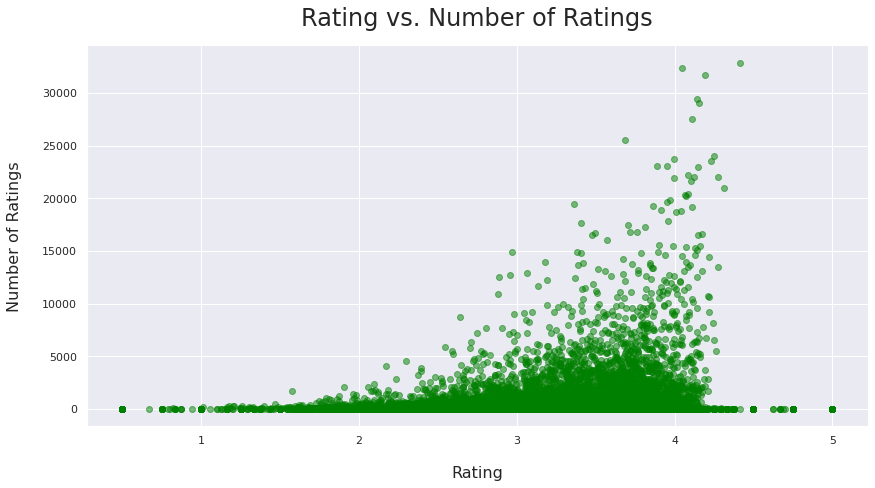

In [37]:
#create ratings dataframe
ratings_df = pd.DataFrame()

#extract average ratings
ratings_df['Mean_Rating'] = df_merge3.groupby('title')['rating'].mean().values

#extract average number of ratings
ratings_df['Num_Ratings'] = df_merge3.groupby('title')['rating'].count().values

#make a plot
fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Rating vs. Number of Ratings', fontsize=24, pad=20)
ax.set_xlabel('Rating', fontsize=16, labelpad=20)
ax.set_ylabel('Number of Ratings', fontsize=16, labelpad=20)

plt.scatter(ratings_df['Mean_Rating'], ratings_df['Num_Ratings'], alpha=0.5, color='green')

* The more a movie gets more ratings it’s average ratings tends to increase. This also means that, If more and more people are watching a particular movie, it probably has a good budget and good marketing, and they are highly rated.

# **Visualising Genres**

The genres variable will surely be important while building the recommendation engines since it describes the content of the film (i.e. Animation, Horror, Sci-Fi). A basic assumption is that films in the same genre should have similar contents. I'll attempt to see exactly which genres are the most popular.

In [38]:
movies = df_movies.copy()

In [39]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    """  
    
    This function counts the number of times each 
    of the genre keywords appear  
    
    Input : movies dataframe, column from dataframe,
    label column from dataframe
    datatype : dataframe        
    
    output : list    
    
    """
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 25606],
 ['Comedy', 16870],
 ['Thriller', 8654],
 ['Romance', 7719],
 ['Action', 7348]]

* The top 5 genres are, in that respect order: Drama, Comedy,Thriller, Romance and Action,.We will show this on a wordcloud too in order to make it more visually appealing.

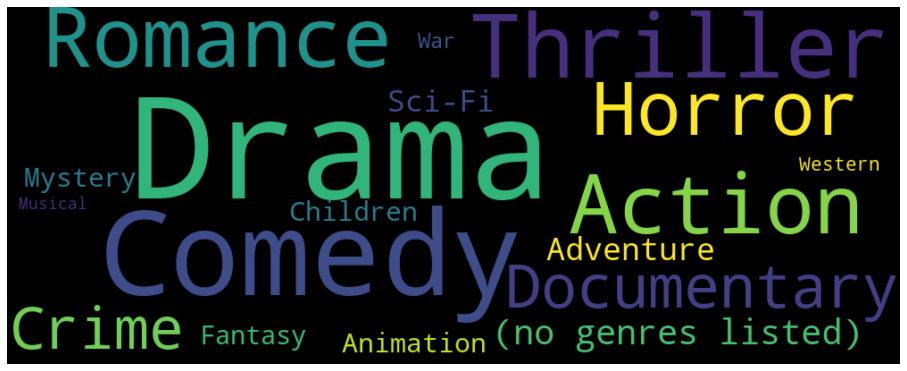

In [42]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='black')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

* The top 5 genres are, in that respect order: Drama, Comedy, Action, Thriller, and Romance. 

In [43]:
df = df_imdb[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(df_movies[['movieId', 'genres', 'title']], on='movieId', how='inner')
df.head(1)

,movieId,title_cast,director,plot_keywords,genres,title
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)


In [44]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)

# Removing spaces between names
df['director'] = df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df['title_cast'] = df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])

# Discarding the pipes between the plot keywords' and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))

df.head(1)

,movieId,title_cast,director,plot_keywords,genres,title
0,1,"[tomhanks, timallen, donrickles]",johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995)


# **Genre Popularity**

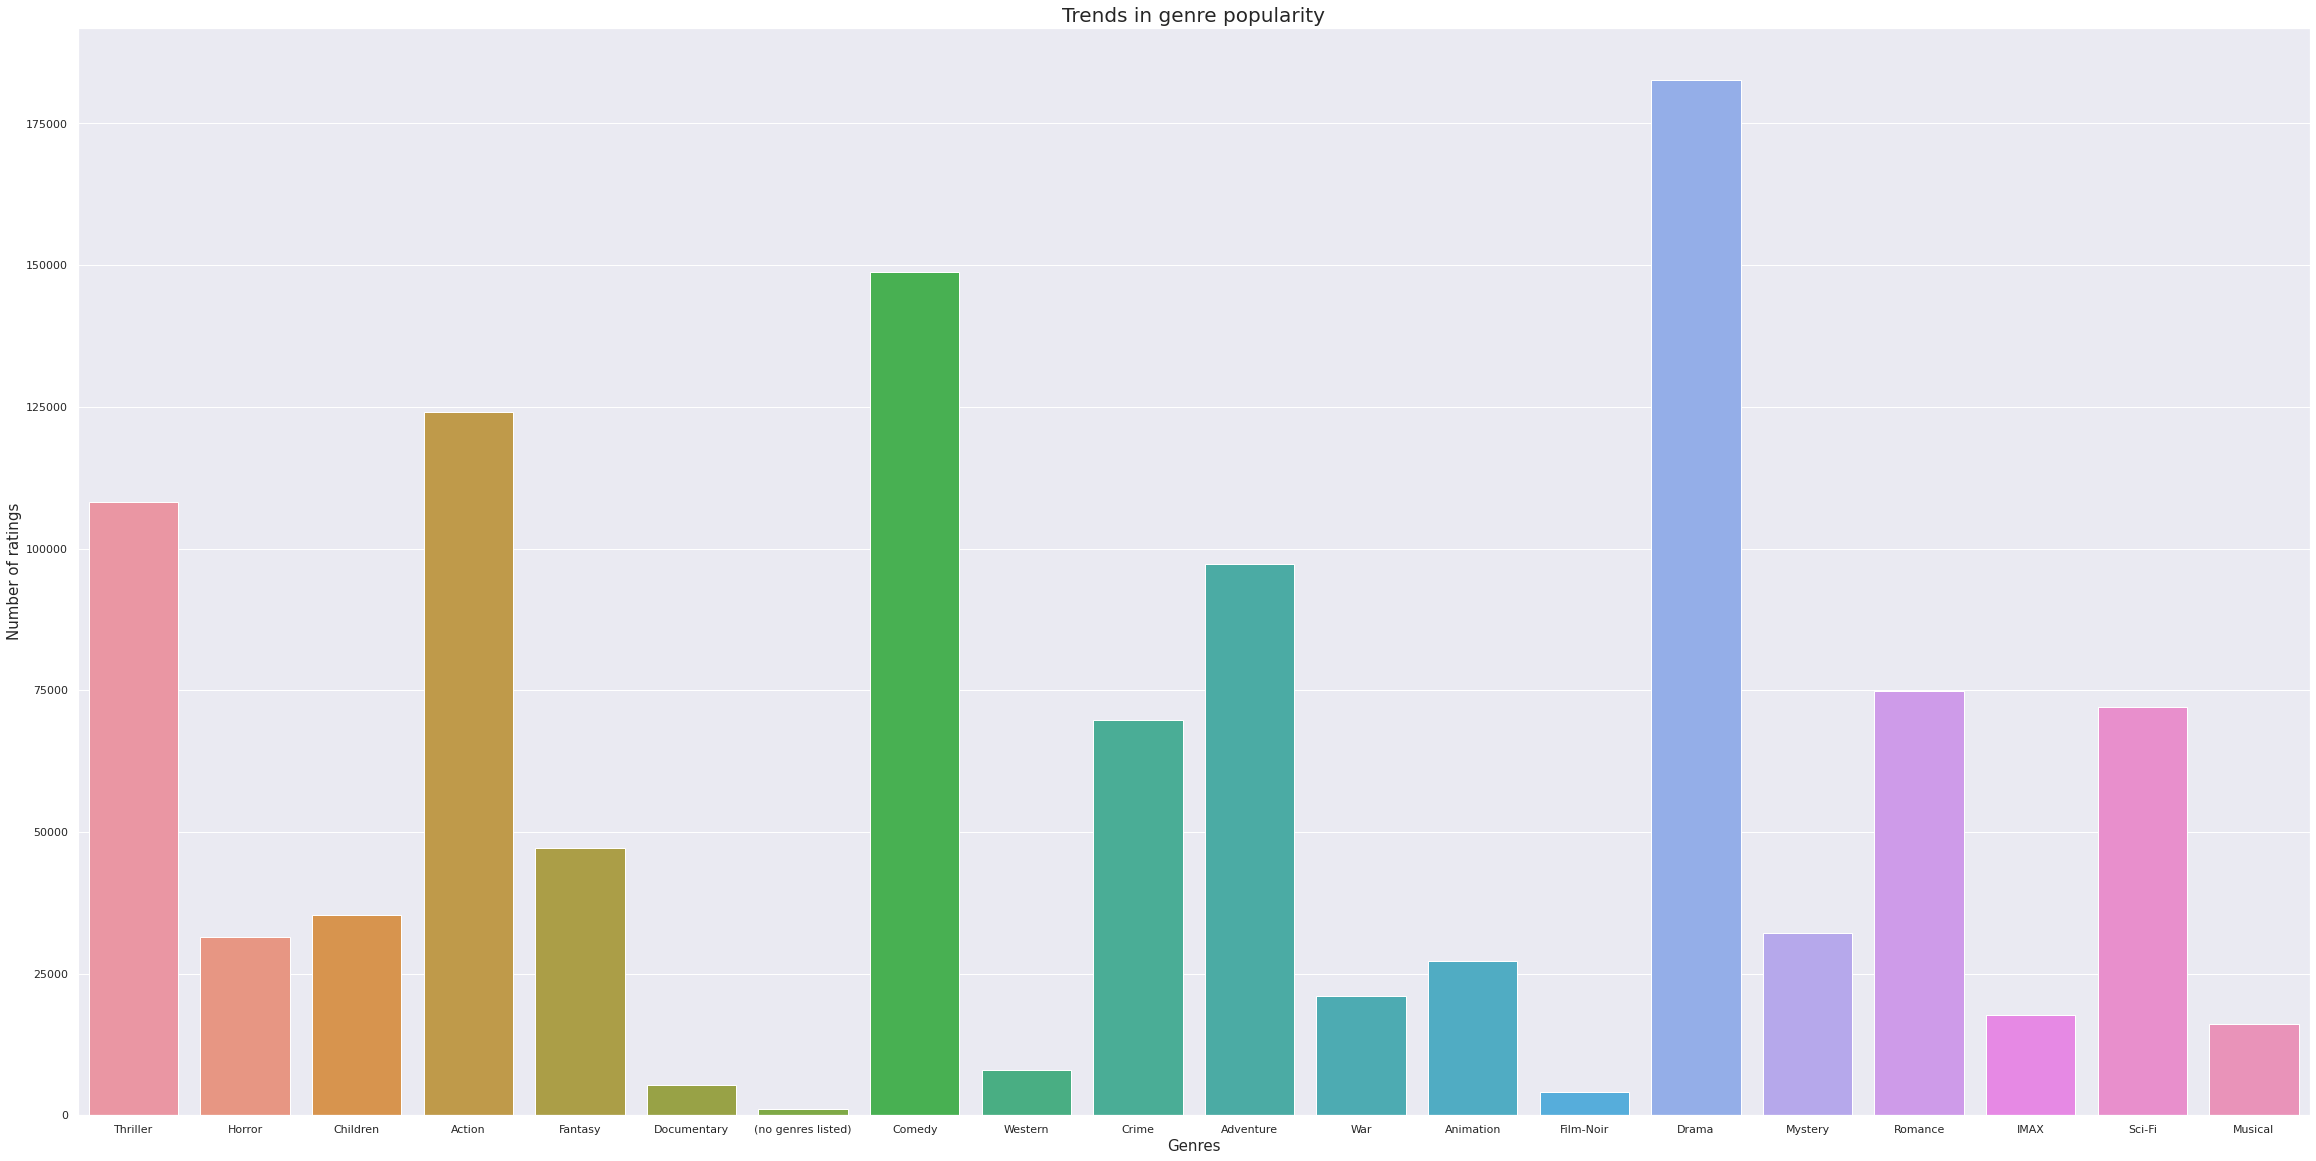

In [45]:

def most_watched(input_df):
    
    """  
    
    This function gives out the number of ratings
    for each genre for each year since 1970  
    
    Input : dataframe
    datatype : dataframe        
    
    output : Figure (bar graph)
    
    """
    # Create a copy of the input dataframe and merge it to the movies dataframe
    df = input_df.copy()
    df = df.merge(df_movies,on='movieId',how='left')
    
    # Create an empty dataframe
    b = pd.DataFrame()
    
    # Extract the timestamps and genres 
    timestamps = [timestamp for timestamp in df.timestamp]
    all_genres = set(','.join([genres.replace('|',',') for genres in df.genres]).split(','))
    
    # Get the number of ratings for each genre for each year since 1970
    for index,genre in enumerate(all_genres):
        a = pd.Series([int((timestamps[i]/31536000)+1970) for i,x in enumerate(df.genres) if genre in x])
        a = a.value_counts()
        b = pd.concat([b,pd.DataFrame({genre:a})],axis=1)
        
    # Create trace
    trace = go.Bar(x = data.index,
    text = ['{:.1f} %'.format(val) for val in (data.values / df_merge1.shape[0] * 100)],
    textposition = 'auto',
    textfont = dict(color = '#000000'),
    y = data.values,
    marker = dict(color = '#db0000'))
    
    
    # Plot the trends for each genre on the same line graph 
    plt.figure(figsize=(40,20))
    plot = sns.barplot(data=b, ci=None)
      
    # Add plot labels
    plt.title('Trends in genre popularity',fontsize=20)
    plt.xlabel('Genres', fontsize=15)
    plt.ylabel('Number of ratings', fontsize=15)
    
    plt.show()
    
    return

most_watched(train)

* It is reasonable to expect that movies with a high number of ratings have also garnered a high number of views.
* It is clear looking at the bar graph that Comedy, Drama and Action have the highest number of ratings and therefore views, it is therefore advisable to commission more of these genres of movie in order to increase viewership which in turn will increase revenue.

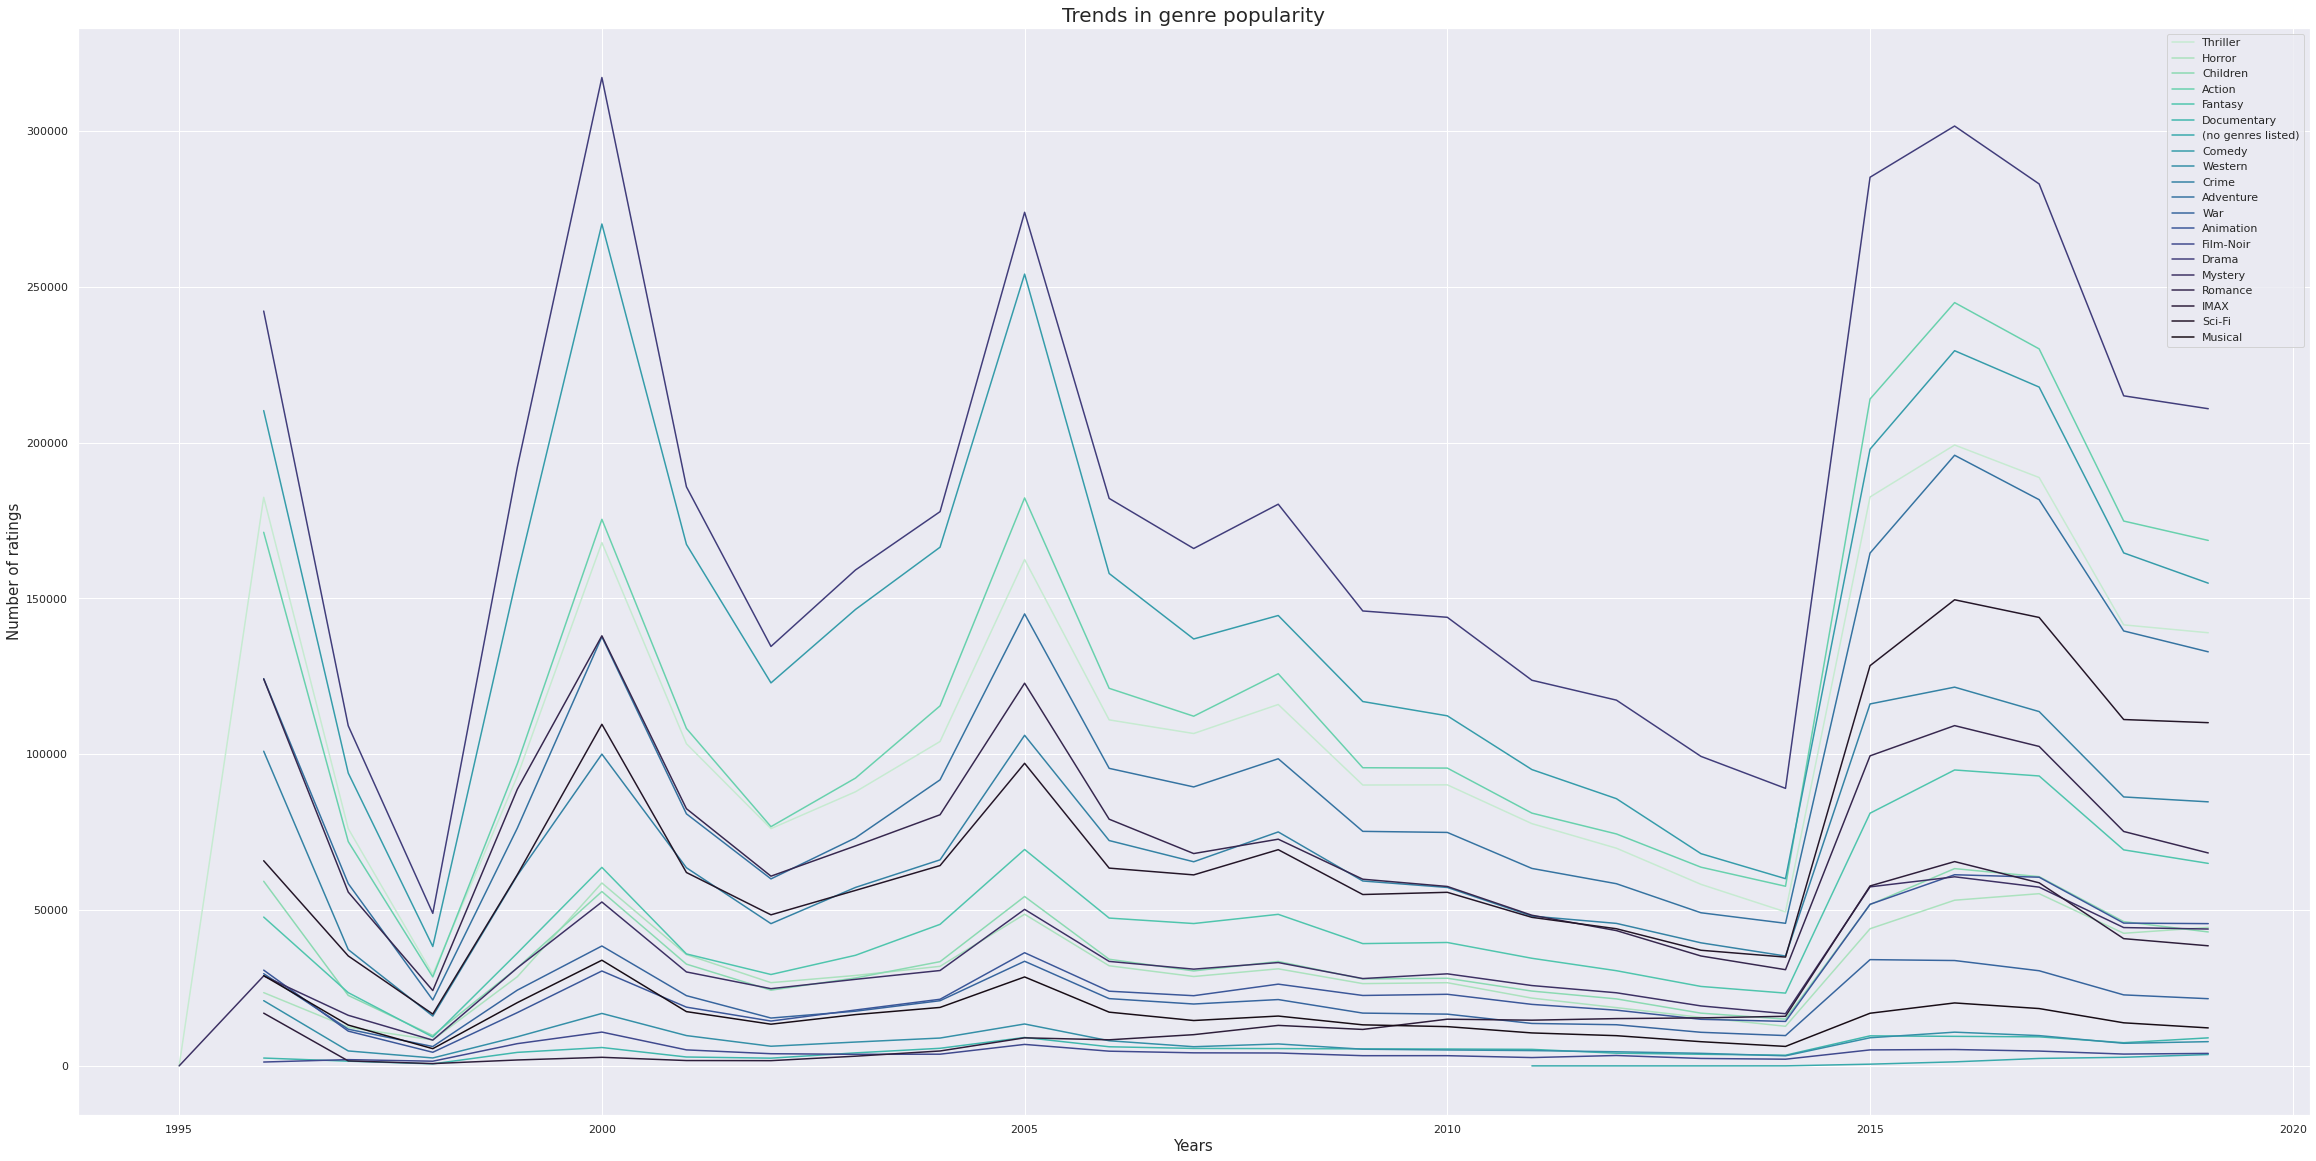

In [47]:

def most_watched(input_df): 
    
    """"
    This function gives out the number of ratings
    for each genre for each year since 1970  
    
    Input : dataframe
    datatype : dataframe        
    
    output : Figure (line graph)
    
    """
    
    # Create a copy of the input dataframe and merge it to the movies dataframe
    df = input_df.copy()
    df = df.merge(df_movies,on='movieId',how='left')
    
    # Create an empty dataframe
    b = pd.DataFrame()
    
    # Extract the timestamps and genres 
    timestamps = [timestamp for timestamp in df.timestamp]
    all_genres = set(','.join([genres.replace('|',',') for genres in df.genres]).split(','))
    
    # Get the number of ratings for each genre for each year since 1970
    for index,genre in enumerate(all_genres):
        a = pd.Series([int((timestamps[i]/31536000)+1970) for i,x in enumerate(df.genres) if genre in x])
        a = a.value_counts()
        b = pd.concat([b,pd.DataFrame({genre:a})],axis=1)
    
    # Plot the trends for each genre on the same line graph 
    plt.figure(figsize=(40,20))
    palette = sns.color_palette("mako_r", 20)
    sns.set()
    sns.set_palette("PuBuGn_d")
    plot = sns.lineplot(data=b, dashes=False, palette=palette)
      
    # Add plot labels
    plt.title('Trends in genre popularity',fontsize=20)
    plt.xlabel('Years', fontsize=15)
    plt.ylabel('Number of ratings', fontsize=15)
    
    plt.show()
    
    return

most_watched(train)

**Observations:**
* It is reasonable to expect that movies with a high number of ratings have also garnered a high number of views.
* Therefore the higher the number of ratings the greater the popularity.

**Recommendations:**

* Netflix should endeavor to match the order of genre of movies available in terms of quantity to the popularity of the genre so as to maximise the views, this in turn will maximise the return on investment in films.
* For example Drama is currently the most popular genre in the dataset and if comedy were to take the number one spot we would suggest to Netflix to commission more comedy movies than drama.
* This is especially important because networks/production companies are creating their own streaming servises which reduces the amount of content that they licenced out to Netflix and therefore they are producing in house content.

# **Visualising Movies**

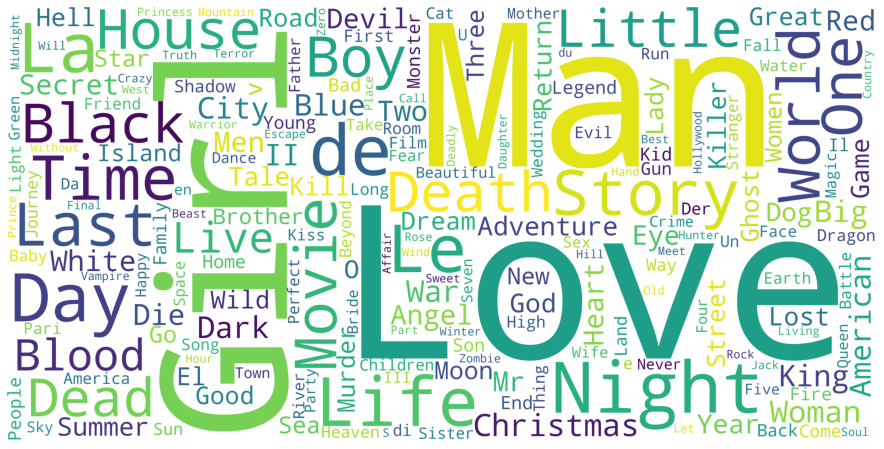

In [48]:
# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

**Observations:**
* We can observe that Man, Girl and Love are larger then the rest, which informs us that they are the most popular title words.
* II, III and three are relatively small which tells us that they are relatively less popular than other title words.

**Recommendations:**

* The deminutive nature of II, III and three tell us that there were not a lot of franchise films and this is a worry for netflix because we know that franchise films are created because they already have establish fanbases which if brought to netflix would add to the viewership and improve the revenue.
* Love, La, Girl and Man were the most occuring title words this matches up with the popularity line graph as romance and drama are amongst the top films, if any changes are obseved in the relative popularity of the genre types then this should be reflected in title popularity.

# **Popular Movies by Genre**

In [49]:
genre_df = pd.DataFrame(df_merge3['genres'].str.split('|').tolist(), index=df_merge3['movieId']).stack()
genre_df = genre_df.reset_index([0, 'movieId'])
genre_df.columns = ['movieId', 'Genre']

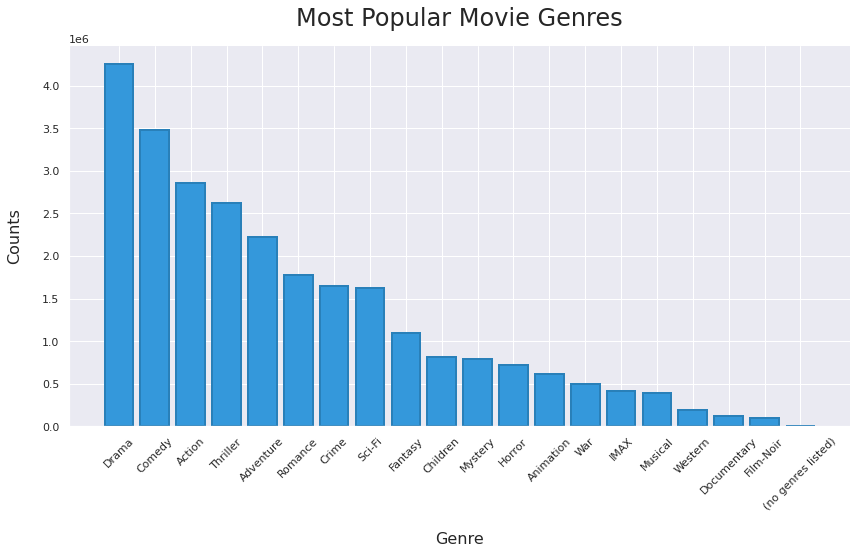

In [50]:
def make_bar_chart(dataset, attribute, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    
    """"
    This function gives the count of the
    different genres
    
    Input : dataframe, dataframe column,
    colour of figure, title of figure,
    x and y labels
    datatype : dataframe        
    
    output : Figure (bar plot)
    
    """
    
    if sort_index == False:
        xs = dataset[attribute].value_counts().index
        ys = dataset[attribute].value_counts().values
    else:
        xs = dataset[attribute].value_counts().sort_index().index
        ys = dataset[attribute].value_counts().sort_index().values
    
    # Plotting the figure   
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    # Plot the bar graph
    plt.bar(x=xs, height=ys, color=bar_color, edgecolor=edge_color, linewidth=2)
    plt.xticks(rotation=45)
    
# Show the bar chart with selected features    
make_bar_chart(genre_df, 'Genre', title='Most Popular Movie Genres', xlab='Genre', ylab='Counts')

**Observations:**
* Drama, Comedy, Action, Thriller and adventure are the top 5 genre in the dataset.

**Recommndations:**
* Netflix should endeavor to match the order of genre of movies available in terms of quantity to the popularity of the genre so as to maximise the views, this in turn will maximise the revenue in films.

# **Movie Published per Year**

In [51]:
# Create an empty list
years = []
# Finding the number of movies published in each year
for title in df_merge3['title']:
    year_subset = title[-5:-1]
    try: years.append(int(year_subset))
    except: years.append(9999)
# Create a new column in a dataframe.       
df_merge3['moviePubYear'] = years
print('The Number of Movies Published each year:',len(df_merge3[df_merge3['moviePubYear'] == 9999]))

The Number of Movies Published each year: 713


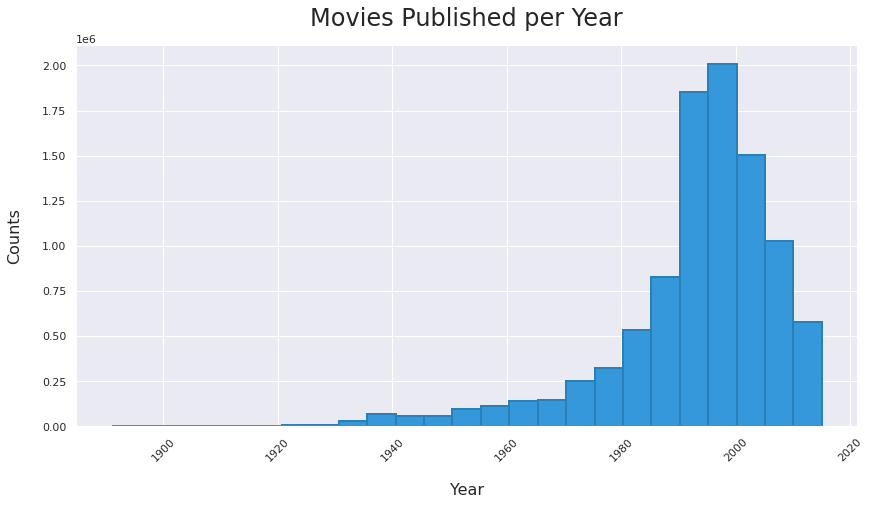

In [52]:
def make_histogram(dataset, attribute, bins=25, bar_color='#3498db', edge_color='#2980b9', 
                   title='Title', xlab='X', ylab='Y', sort_index=False):
    """"
    This function gives a plot of the
    number of movies published per year
    
    Input : dataframe, dataframe column,
    bins, colour of figure, title of figure,
    x and y labels
    datatype : dataframe        
    
    output : Figure (bar plot)
    
    """
    if attribute == 'moviePubYear':
        dataset = dataset[dataset['moviePubYear'] != 9999]
        
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2)
    
    plt.xticks(rotation=45)
    
    
make_histogram(df_merge3, 'moviePubYear', title='Movies Published per Year', xlab='Year', ylab='Counts')

**Observations:**
* We observed a decrease in the movies published per year from 2000

**Reccomendations:**
* It is not clear what accounts for the decrease in movies published but possible reasons for this change include finacial crisis in 2000 and in 2009.



In [53]:
df_merge3.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,numRatings,release_year,moviePubYear
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,4253,2008,2008
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,4253,2008,2008


In [54]:
# Create a dataframe with the number of movies that the directors have made
director_m = pd.DataFrame(data_1.groupby('director').count()['title'].sort_values(ascending=False)).reset_index()
# View the first five directors
director_m.head()

,director,title
0,Luc Besson,26
1,See full summary,25
2,Woody Allen,25
3,Stephen King,23
4,William Shakespeare,18


In [55]:
# the least and most number of movies by directors in the dataset.

print(f'No of unique movies: \t{len(data_1)}\nLeast produced: \t{director_m.title.min()}\nMost produced: \t\t{director_m.title.max()}')

No of unique movies: 	23544
Least produced: 	1
Most produced: 		26


In [56]:
# View the director and the count of ratings
pd.DataFrame(data_1.groupby('director').sum()['numRatings'].sort_values(ascending=False)).reset_index()


,director,numRatings
0,Quentin Tarantino,109919
1,Michael Crichton,65157
2,J.R.R. Tolkien,62963
3,Lilly Wachowski,60988
4,Stephen King,59903
...,...,...
9990,Kirsten Johnson,1
9991,Kobi Shely,1
9992,Aris Bafaloukas,1
9993,Kristinn Thordarson,1


# **Number of ratings per director**

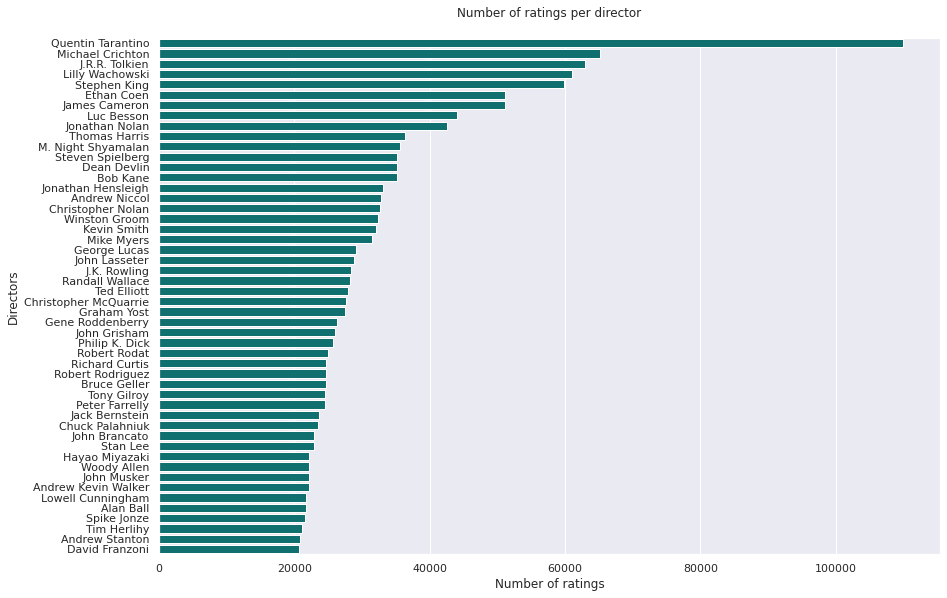

In [57]:
#df_merge3.sort_values(by='numRatings', ascending=False).drop_duplicates('movieId')[:100]
director_n = pd.DataFrame(data_1.groupby('director').sum()['numRatings'].sort_values(ascending=False)).reset_index()

# visualize the number of movies per director
plt.figure(figsize = (14, 9.5))
sns.barplot(data = director_n.head(50), y = 'director', x = 'numRatings', color = 'teal')
plt.ylabel('Directors')
plt.xlabel('Number of ratings')
plt.title('Number of ratings per director\n')
#plt.xlim(0, 27)
plt.show()

# **Number of moviesper director**

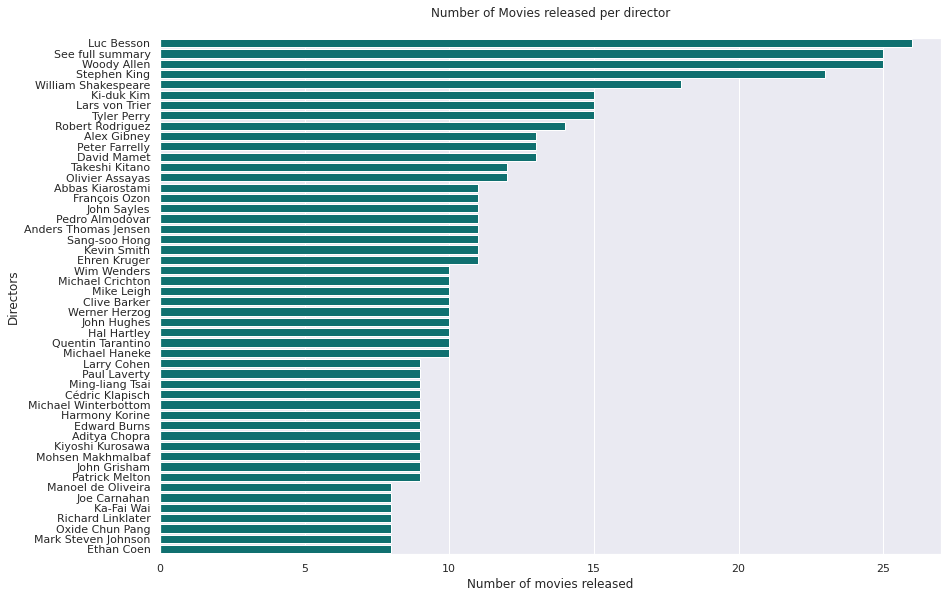

In [58]:
# visualize the number of movies per director
plt.figure(figsize = (14, 9.5))
sns.barplot(data = director_m.head(50), y = 'director', x = 'title', color = 'teal')
plt.ylabel('Directors')
plt.xlabel('Number of movies released')
plt.title('Number of Movies released per director\n')
plt.xlim(0, 27)
plt.show()

**Observations:**
* The bar chart reflects the number of movies per director. The chart is layed out such that the directors with the most movies produced are reflected first in descending order of the number of movies per director.
* Luc Besson is the most prolific director out of all directors in the dataset.


In [59]:
# Create a list from the dataframe of the movie count of directors
top_100_produced = list(director_m.director.head(100))

top_produced = data_1[data_1['director'].isin(top_100_produced)]

In [60]:
# find the mean rating for the movies
avg_per_director = df_merge3[['rating','movieId']].groupby('movieId').mean().reset_index()

In [61]:
# update the ratings of the movies with the average rating
top_produced = pd.merge(top_produced.drop('rating',1),avg_per_director,on='movieId').sort_values('rating',ascending=False)

In [62]:
print(f'Min_rating: \t{top_produced.rating.min()}\nMax_rating: \t{top_produced.rating.max()}\nMean_rating: \t{round(top_produced.rating.mean(),2)}')

Min_rating: 	0.5
Max_rating: 	4.5
Mean_rating: 	3.26


In [63]:

#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = data_1[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index =data_1[x].idxmax()
    high = pd.DataFrame(data_1.loc[high_index,:])
    low = pd.DataFrame(data_1.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",data_1['title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",data_1['title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('budget')

Movie Which Has Highest budget :  My Way (Mai Wei) (2011)
Movie Which Has Lowest budget  :  Man Who Could Work Miracles, The (1936)


,9563525,16366
userId,117395,120949
movieId,100062,81768
rating,3,3
timestamp,1573945275,1289595242
title,My Way (Mai Wei) (2011),"Man Who Could Work Miracles, The (1936)"
genres,Action|Drama|War,Comedy|Fantasy
title_cast,Dong-Gun Jang|Joe Odagiri|Bingbing Fan|In-kwon...,NaN
director,Je-kyu Kang,NaN
runtime,137,NaN
budget,30000000000,0


* We can see that Stephen King (23 movies released) and Edward Burns (9 movies released) are outperforming the directors; inclusive of Luc Besson who has the most movies directed (26).

# **Top Ten Budget Movies**

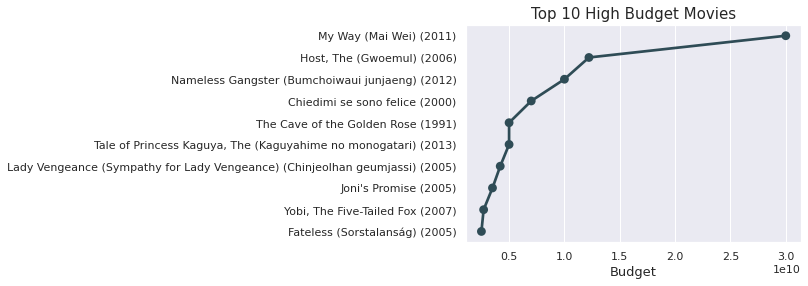

In [64]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(data_1['budget'].sort_values(ascending = False))
info['title'] = data_1['title']
data = list(map(str,(info['title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

**Observations:**

* This is a line graph which shows the Top 10 high budget movies of which My Way is the Top budget Movie.

# **Top Ten Longest Movies**

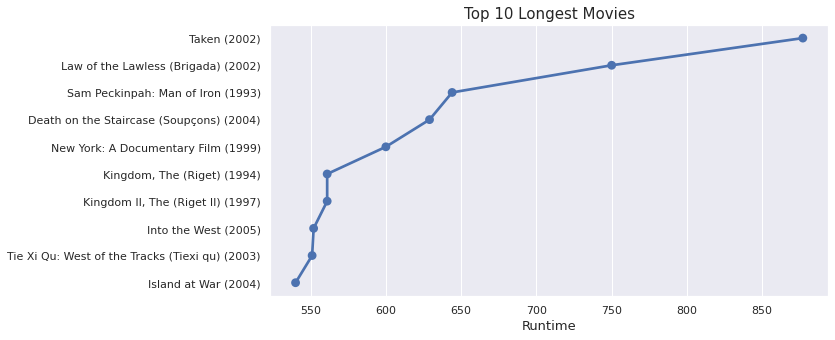

In [65]:
#top 10 Movies With Longest runtime
#sort the 'runtime' column in decending order and store it in the new dataframe.
info = pd.DataFrame(data_1['runtime'].sort_values(ascending = False))
info['title'] = data_1['title']
data = list(map(str,(info['title'])))

#extract the top 10 longest duraton movies data from the list and dataframe.
x = list(data[:10])
y = list(info['runtime'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")


**Observations:**

* This is a line graph which shows the top 10 longest movies of which taken is the longest Movie.

# Average Runtime Per Annum

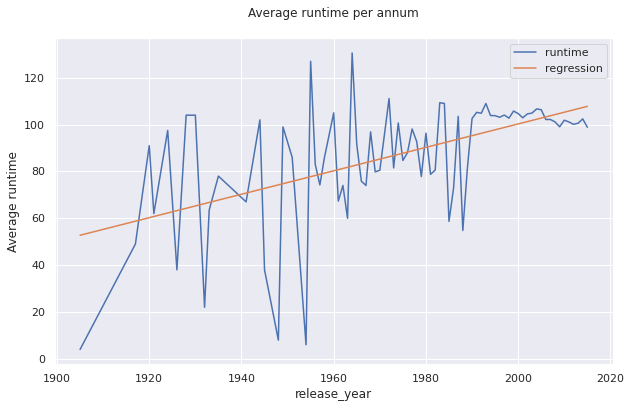

In [66]:
from sklearn.linear_model import LinearRegression

# create a dataframe with runtime data
runtime_data = pd.DataFrame(data_1.dropna().groupby('release_year').mean()['runtime']).dropna()
runtime_data.index = runtime_data.index.astype('int')
runtime_data = runtime_data[runtime_data['runtime']>1].copy()

# train a linear regression model for the trend
lrm = LinearRegression()
runtime_data = runtime_data.reset_index()
lrm.fit(runtime_data.release_year.values.reshape(-1,1),runtime_data.runtime.values.reshape(-1,1))

# make predictions
runtime_data['regression'] = lrm.predict(runtime_data.release_year.values.reshape(-1,1))

# visualize the runtime per annum
runtime_data = runtime_data.set_index('release_year')
runtime_data.plot(figsize=(10,6))
plt.title("Average runtime per annum\n")
plt.ylabel("Average runtime")
plt.show()

**Observation:**
* We can see that average runtime of movies have consistantly increased from 1900 to the early 1990's from which time it has plateued until the last year of the dataset, this could be due to the decrease in the crisis of studio lot time which allows movies to be made longer due to the reduction in cast. 
* We can observe that there has been an high variation from 1900 to early 1990 and less variation till the end of the dataset this could be due to the fact that movies produed in the 90's were very short.

**Recommendations:**
* As seen in the line graph movie runtime had a high variation and that could be attributed to the technological advancement which feedback could not be given to producers or directors but anytime prior to 2000 the runtime has stabilised which could be because everyone now has internet and since they have internet they can voice out their opinions.
* The later years of 2000 is slightly declining as seen on the graph therefore producesrs should produce shorter movies.


# **Average Budget Per Annum**


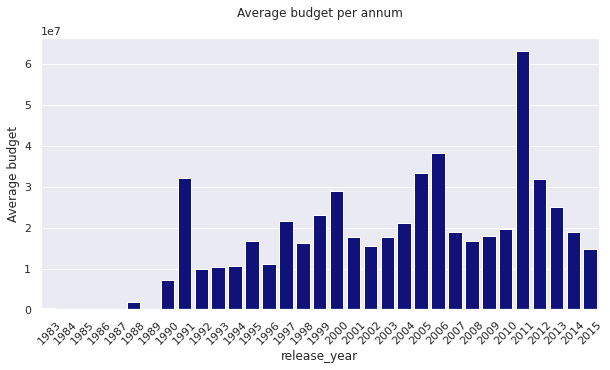

In [67]:
# create a dataframe with budget data
budget_data = pd.DataFrame(data_1.dropna().groupby('release_year').mean()['budget']).dropna()
budget_data.index = budget_data.index.astype('int')
runtime_data = budget_data[budget_data['budget']>1].copy()

# # make predictions
budget_data = budget_data.reset_index()
budget_data = budget_data.drop('budget',1).merge(pd.DataFrame(budget_data[budget_data['release_year']>1982]), on ='release_year')

# # visualize the budget per annum
plt.figure(figsize=(10,5))
sns.barplot(x='release_year',y='budget',data=budget_data, color='darkblue')
plt.title("Average budget per annum\n")
plt.ylabel("Average budget")
plt.xticks(rotation=45)
plt.show()

**Observations:**
* There is an observable trend of increase in average budget of budget of film  which could be due to special effects and CGI.

**Recommendations:**
* This trend is particularly relavent for the streaming service as networks and production houses are producing their own competing sreaming services and therefore are removing their content from existing streaming servises which puts pressure on sreaming servises to create more in-house content. 


# **Genre With Highest Release**

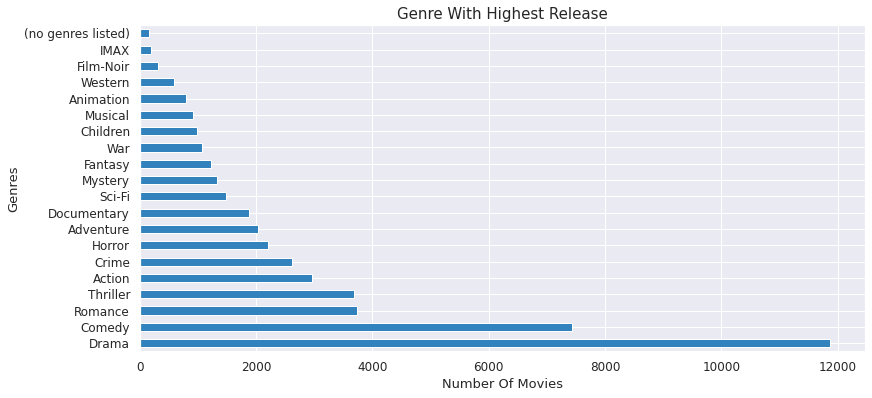

In [68]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    
    """"
    This function gives a function will split
    the string and return the count of each genre.
    
    Input : dataframe column
    datatype : dataframe (integer)        
    
    output : Figure (bar plot)
    
    """
    
    #concatenate all the rows of the genrs.
    data_plot = data_1[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

**Observations:**
* Drama, Comedy, Action, Thriller and adventure are the top 5 genre in the dataset.

**Recommndations:**
* Netflix should endeavor to match the order of genre of movies available in terms of quantity to the popularity of the genre so as to maximise the views, this in turn will maximise the revenue in films.

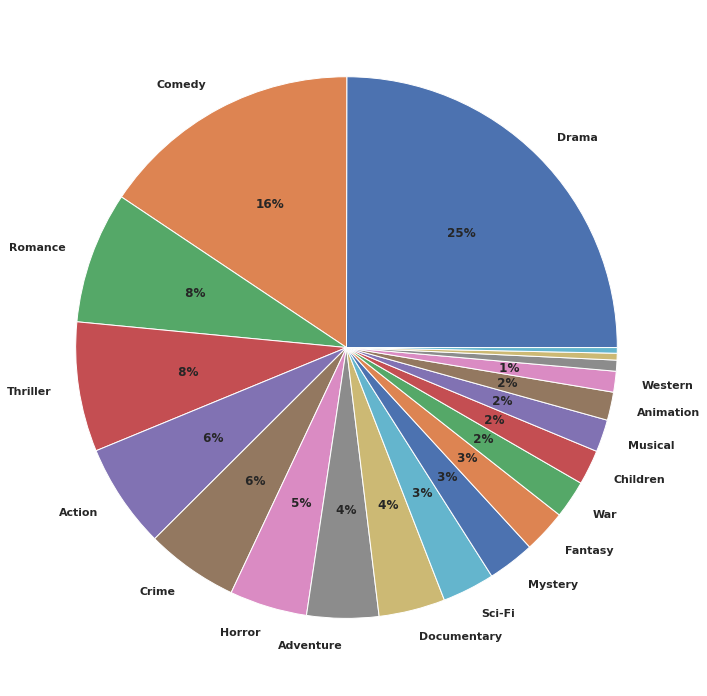

In [70]:
i = 0
# Create a list for the genre count
genre_count = []
#
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
# Create a plot    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(10, 10))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
# Plotting the pie chart
plt.tight_layout()

**Observations:**

* The Pie Chart represents the same thing as the Bar graph of the movie released with the added benifit of the relative distribution of releases.



# **Correlation of Features**

In [71]:
def plot_correlation_map( df ):
    
    """"
    This function gives a correlation map
    using all the features from merged data.
    
    Input : dataframe column
    datatype : dataframe (integer)        
    
    output : Figure (bar plot)
    
    """
    # Plotting using the features
    
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

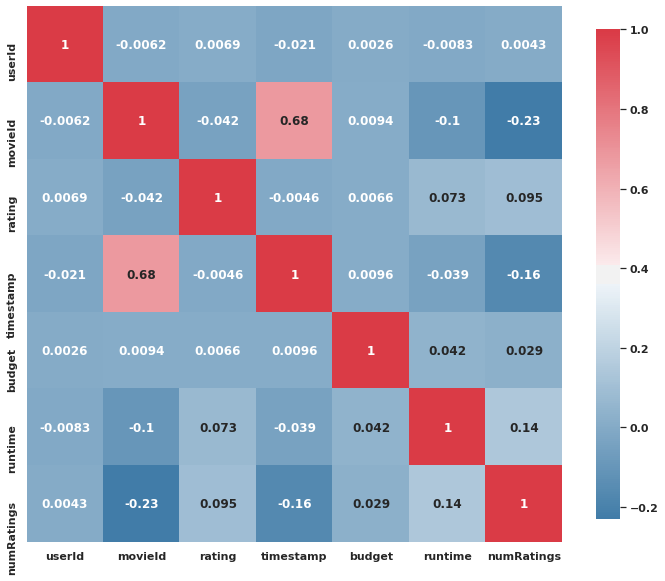

In [72]:
# Select a number of features from the dataframe to make the correlation map
plot_correlation_map(data_1[['userId','movieId','rating', 'timestamp', 'budget','runtime', 'numRatings']])

**Observations:**
* We can obseve that there arent any significat positive correlations amongst the features , aside from timestamp and movieId
* There is a very clear correlation between movieId and timestamp, this is possibly because movies have different lengths and do not end at exactly the same time

# Content Base Filtering and Collaborative Filtering


**What Is Content based Filtering?**

This filtering is based on the description or some data provided for that product. The system finds the similarity between products based on its context or description. The user’s previous history is taken into account to find similar products the user may like.
For example, if a user likes movies such as ‘Mission Impossible’ then we can recommend him the movies of ‘Tom Cruise’ or movies with the genre ‘Action’.

**Techniques used for our content based filtering:**

We used CountVectoriser that is used in Feature Extraction which entirely is responsible for convecting text into vectors.
and the reaseon why we chose to use count vectoriser instead of tfidVectoriser is to avoid penelising keywords, directors and genres that occured more frequently essentially because if we have a high count in the dataset this doesn't mean that the word is less important. 

**Why we dont consider Content based filtering:**

content-based recommendation systems are limited because they do not contain other user data. And it doesn’t help a user discover their potential tastes.
For example, let’s say that user A and user B like drama movies. User A also likes comedy movies, but since you don’t have that knowledge, you keep offering drama movies. Eventually, you’re eliminating other options that user B potentially might like.


**What is cosine similarity?**

Cosine similarity is a method for measuring similarity between vectors. Mathematically, it calculates the cosine of the angle between the two vectors. If the angle between the two vectors is zero, the similarity is calculated as 1 because the cosine of zero is 1. So the two vectors are identical. The cosine of any angle varies from 0 to 1. Therefore, similarity rates will vary from 0 to 1. The formula is expressed as follows:
 
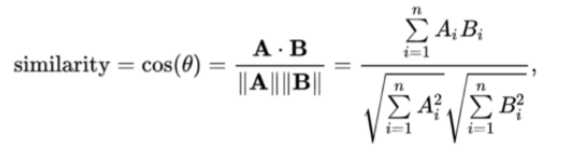



**Advantages:**

* The user gets recommended the types of items they love.
* The user is satisfied by the type of recommendation.
* New items can be recommended; just data for that item is required.

**Disadvantages:**

* The user will never be recommended for different items.
* Business cannot be expanded as the user does not try a different type of product.
* If the user matrix or item matrix is changed the cosine similarity matrix needs to be calculated again.
* Limited content analysis: If the content doesn’t contain enough information to discriminate the items precisely, the recommendation itself risks being imprecise.
* Over-specialization: Content-based filtering provides a limited degree of novelty, since it has to match up the features of a user’s profile with available items. In the case of item-based filtering, only item profiles are created and users are suggested items similar to what they rate or search for, instead of their past history. A perfect content-based filtering system may suggest nothing unexpected or surprising.

In [7]:
movies = df_movies.copy()

In [8]:
#
df_1 = df_imdb[['movieId','title_cast','director', 'plot_keywords']]
df_1 = df_1.merge(movies[['movieId', 'genres', 'title']], on='movieId', how='inner')
df_1.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995)
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance,Grumpier Old Men (1995)
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance,Waiting to Exhale (1995)
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy,Father of the Bride Part II (1995)


In [9]:
# Convert data types to strings for string handling
df_1['title_cast'] = df_1.title_cast.astype(str)
df_1['plot_keywords'] = df_1.plot_keywords.astype(str)
df_1['genres'] = df_1.genres.astype(str)
df_1['director'] = df_1.director.astype(str)

# Removing spaces between names
df_1['director'] = df_1['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df_1['title_cast'] = df_1['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
df_1['title_cast'] = df_1['title_cast'].map(lambda x: x.split('|'))

# Discarding the pipes between the plot keywords' and getting only the first five words
df_1['plot_keywords'] = df_1['plot_keywords'].map(lambda x: x.split('|'))
df_1['plot_keywords'] = df_1['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df_1['genres'] = df_1['genres'].map(lambda x: x.lower().split('|'))
df_1['genres'] = df_1['genres'].apply(lambda x: " ".join(x))

df_1.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,"[tomhanks, timallen, donrickles, jimvarney, wa...",johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995)
1,2,"[robinwilliams, jonathanhyde, kirstendunst, br...",jonathanhensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995)
2,3,"[waltermatthau, jacklemmon, sophialoren, ann-m...",markstevenjohnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995)
3,4,"[whitneyhouston, angelabassett, lorettadevine,...",terrymcmillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995)
4,5,"[stevemartin, dianekeaton, martinshort, kimber...",alberthackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995)


In [10]:
#we convert the tille_cast column from list to string
df_1['liststring'] = df_1['title_cast'].apply(lambda x: ','.join(map(str, x)))

#we remove the commas between the string in each row
df_1['liststring'] = df_1['liststring'].replace(',',' ', regex=True)

#we choose keywords, cast(liststring), diector and genres column to use as our features
df_features = df_1[['liststring','director','plot_keywords','genres']]

#we combine the features columns into  single string
df_1['combined_features'] = df_features['liststring'] +' '+ df_features['director'] +' '+ df_features['plot_keywords'] +' '+ df_features['genres']

#we now feed the combined features to a CountVectorizer() object for getting the cv matrix.
cv =CountVectorizer()
cv_matrix = cv.fit_transform(df_1['combined_features'])

#now we obtain the cosine similarity matrix from the cv matrix
sim_score = cosine_similarity(cv_matrix,cv_matrix)

df_1.set_index('title', inplace = True)
indices = pd.Series(df_1.index)

In [11]:
print(sim_score)

[[1.         0.10910895 0.07715167 ... 0.03026138 0.         0.07881104]
 [0.10910895 1.         0.         ... 0.06163336 0.         0.08025724]
 [0.07715167 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.03026138 0.06163336 0.         ... 1.         0.         0.03338903]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.07881104 0.08025724 0.         ... 0.03338903 0.         1.        ]]


In [13]:
#Method to get recommenations
def recommendations(title,n,sim_score = sim_score):
    '''
    This method returns movies which are similar.
    
    Input:
        title: name of the movie to be compared
        n: number(quantity) of movies to be returned
        sim_core: similarity score
    Output:
        recommend movies
    '''
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(sim_score[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_n_indexes = list(score_series.iloc[1:n+1].index)
    
    # populating the list with the titles of the best n matching movies
    for i in top_n_indexes:
        recommended_movies.append(list(df_1.index)[i])
        
    return recommended_movies

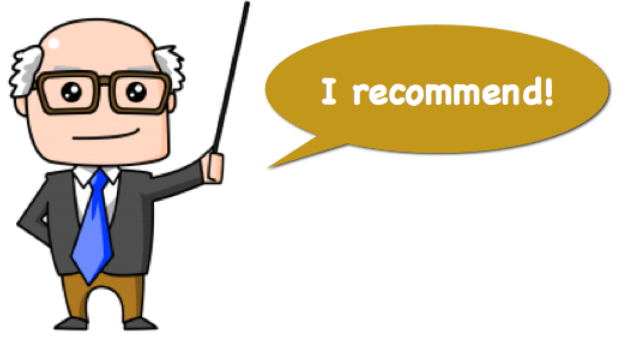


Here’s a glimpse of what happens when you call the above function.

In [14]:
recommendations('Innocence (2014)',10)

['Zu: Warriors from the Magic Mountain (Xin shu shan jian ke) (1983)',
 'King Kong (1933)',
 'The Man in the Orange Jacket (2014)',
 'Island of Dr. Moreau, The (1977)',
 'She (1965)',
 'MirrorMask (2005)',
 'Printed Rainbow (2006)',
 'Seventh Son (2014)',
 'The Prophecy: Forsaken (2005)',
 'The Damned (2014)']

**Observations:**
* We can observe that the top 10 movies above are similar movies to the movie Innocent released in 2014.

**Recommendations:**

* Since a user will not be pretty impresive with a list of recommendations, a possible improvement for this content based recommendation system would be to only keeping the most recent.

* Content-based filtering is not practical, or rather, not very dependable when the number of items increases along with a need for clear and differentiated descriptions.

* To overcome all the issues discussed earlier, we can implement collaborative filtering techniques, which have proven to be better and more scalable.

* The content based method is also extremely memory intensive therefore we will focus on collaborative filtering

# **Collaborative Filtering**

**What Is Collaborative Filtering?**

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users.

It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

to be more precise it is based on similarity in preference , taste and choices of two users. A good example that we can give you could be if user A likes movies 1,2 and 3 and user B likes movies 2,3 and 4 then this implies that they have similar interests and user A should like movie 4 and B should like movie 1.


**Why Do We Consider Collaborating Filtering Over Content Based Filtering?**

Collaborative filtering recommender engine is a much better algorithim then content content based filtering since it is able to do feature laerning on its own, in other words it can laern which features to use

**Advantages of Collaborative filtering:**

Taken that we find collaborative filtering better than content based, We will give a few adavntages to support the argument.

* Takes other user ratings into consideration 
* Doesnt need to study or extract information from recommended item.
* It adapts to the user' interest which might change over time.

**About Collaborative Filtering Datasets:**

To take note that in order for us to implement this algorithm or any recommendation algorithms  we need a specific dataset that is stuctured in a specific format. This data should entail a set of items and users who have reacted to some of the items.

While working with such data, you’ll mostly see it in the form of a matrix consisting of the reactions given by a set of users to some items from a set of items. Each row would contain the ratings given by a user, and each column would contain the ratings received by an item. A matrix with five users and five items could look like this:


**Rating Matrix:**


![](https://files.realpython.com/media/rating-matrix.04153775e4c1.jpg)

The matrix shows five users who have rated some of the items on a scale of 1 to 5. For example, the first user has given a rating 4 to the third item. n most cases, the cells in the matrix are empty, as users only rate a few items. It’s highly unlikely for every user to rate or react to every item available. A matrix with mostly empty cells is called sparse, and the opposite to that (a mostly filled matrix) is called dense.

**How do you measure the accuracy of the ratings you calculate?**

Esentially there are many approaches but we will explain the main approach that we will need for this project which is the Root Mean Square Error (RMSE), in which you predict ratings for a test dataset of user-item pairs whose rating values are already known. The difference between the known value and the predicted value would be the error. Square all the error values for the test set, find the average (or mean), and then take the square root of that average to get the RMSE.

![](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/rmse.png)

Another metric to measure the accuracy is Mean Absolute Error (MAE), in which you find the magnitude of error by finding its absolute value and then taking the average of all error values.

However we will be focusing on the RMSE for our predictions.

Before diving deep into the code we would like to clarify the Type of collaborative filtering we are going to implement. 

Recommender Sysem is divided ito Three brances of which collaborative filtering is entailed, the figure below will make a clear breakdown to the reader.

![](https://www.seoclerk.com/pics/want61009-1nSWOn1525162745.jpg)

You will notice that Collaborative filtering consist of two filtering techniques, 

* **Model-based Technique**
* **Memory-based filtering**

We will give a short description of these techniques. 

* **Model-based Technique**
Model based collaborative filtering algorithms provide item recommendations by first developing a model of user ratings. With these systems you will build a model from user ratings and then make recommendations based on that model, this offers a speed and scalability that not available when
youre forced to refer back to the entire dataset to make a prediction.

* **Memory based filtering**
Memory based rely heavely on simple similarity measures(cosine similarity, pearson correlation and more) to match similar people or items together.
thses consist of two methods namely **Item based** and **user based** collaborative filtering.

The figure below defines the two filtering methods.

![](https://cdn-images-1.medium.com/max/1600/1*7uW5hLXztSu_FOmZOWpB6g.png)

## **User-Based and Item Based**

![](https://cdn-images-1.medium.com/max/1600/1*QvhetbRjCr1vryTch_2HZQ.jpeg)

## **User-user collaborative based filtering(UB-CF)**

**User-User Collaborative Filtering:** 

Here we find look alike users based on similarity and recommend movies which first user’s look-alike has chosen in past. This algorithm is very effective but takes a lot of time and resources. It requires to compute every user pair information which takes time. Therefore, for big base platforms, this algorithm is hard to implement without a very strong parallelizable system.

 A specific application of this is the user-based Nearest Neighbor algorithm. This algorithm needs two tasks:
1.Find the K-nearest neighbors (KNN) to the user a, using a similarity function w to measure the distance between each pair of users:



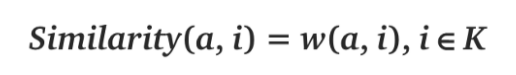

**Advantages:**
* Easy to implement.
* Context independent.
* Compared to other techniques, such as content-based, it is more accurate.

**Disadvantages**
* Sparsity: The percentage of people who rate items is really low.
* Scalability: The more K neighbors we consider (under a certain threshold), the better my classification should be. Nevertheless, the more users there are in the system, the greater the cost of finding the nearest K neighbors will be.
* Cold-start: New users will have no to little information about them to be compared with other users.

In [15]:

# Creating a small test dataframe to evaluate our models
tests = train.copy()
tests.drop(['timestamp'], axis=1, inplace=True)
tests = tests.head(20000)

# Creating the training data
reader = Reader(rating_scale=(0.5, 5))
test_data = Dataset.load_from_df(tests[['userId','movieId','rating']], reader)

# Compute similarities between users using cosine distance
sim_options = {"name": "cosine",
               "user_based": True}  

# Evaluate the model 
user = KNNWithMeans(sim_options=sim_options)
cv = cross_validate(user, test_data, cv=5, measures=['RMSE'], verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1135  1.1224  1.1267  1.1185  1.1386  1.1239  0.0085  
Fit time          10.79   10.52   10.92   10.72   10.59   10.71   0.14    
Test time         0.07    0.07    0.07    0.07    0.07    0.07    0.00    


Using UBCF gives us a RMSE score of 1.1 (based on a 2% sample of the train data)

# **Item-item collaborative based filtering**

**Item-Item Collaborative Filtering:**

It is quite similar to previous algorithm, but instead of finding user’s look-alike, we try finding movie’s look-alike. Once we have movie’s look-alike matrix, we can easily recommend alike movies to user who have rated any movie from the dataset. This algorithm is far less resource consuming than user-user collaborative filtering. Hence, for a new user, the algorithm takes far lesser time than user-user collaborate as we don’t need all similarity scores between users.

In [16]:
# Compute similarities between items using cosine distance
sim_options = {"name": "cosine",
               "user_based": False}  

# Fit the KNNwithmeans algorithm to the training set
item_based = KNNWithMeans(sim_options=sim_options)

# Evaluate the model 
cv = cross_validate(item_based, test_data, cv=5, measures=['RMSE'], verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0673  1.0930  1.0860  1.0768  1.0696  1.0785  0.0097  
Fit time          1.10    1.11    1.12    1.12    1.11    1.11    0.01    
Test time         0.06    0.06    0.06    0.06    0.06    0.06    0.00    


Using IBCF gives us a RMSE score of 1.08 (based on a 2% sample of the train data) which is only a slight improvement on the UBCF method

# **Singular value decomposition (SVD)**


SVD is decomposition of a matrix R which is the utility matrix with m equal to the number of users and m number exposed items (movies) into the product of three matrices:

U is a left singular orthogonal matrix, representing the relationship between users and latent factors 
Σ is a diagonal matrix (with positive real values) describing the strength of each latent factor

V(transpose) is a right singular orthogonal matrix, indicating the similarity between items and latent factors.


![](https://i.ytimg.com/vi/HGsEIMXhNpo/maxresdefault.jpg)

Decompose rating matrix R in unique prosuct of 3 matrices, 
with an aim to reveal latent factors in R by minimizing RMSE

* r is rank of R
* U and V are column orthonomal
* V^T has orthonomal rows
* Sum of is diagonal matrix with singular values

The aim of SVD is to make r smaller by settin smallest  singular
values to 0.



## **Model Building**

**Loading Surprise Dataset:**

We will be using the dataset module which loads the pandas dataframe that is available for this experiment, The reader function is used to parse a file containing ratings data. The default format in which it accepts data is that each rating is stored in a separate line in the order user, movie and rating

In [3]:
# Loading as Surprise dataframe
df_train = train.copy()
reader = Reader()
# Data selected for model training
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)

In [4]:
# Data split 99/1
trainset, testset = train_test_split(data, test_size=0.01)

In [5]:
# Check the info of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


### **Base Algorithm**

In [6]:
# Base algorithm
algo = SVD()

In [7]:
# Fitting our trainset
algo.fit(trainset)

In [8]:
# Using the 15% testset to make predictions
predictions = algo.test(testset) 
predictions

test = pd.DataFrame(predictions)

In [9]:
# View the head
test.head()

,uid,iid,r_ui,est,details
0,100304,551,4.0,3.429093,{'was_impossible': False}
1,41745,1376,4.0,3.032596,{'was_impossible': False}
2,42374,112852,3.0,2.800764,{'was_impossible': False}
3,93082,3452,4.0,3.765819,{'was_impossible': False}
4,136893,104,4.0,3.616704,{'was_impossible': False}


In [10]:
# We are trying to predict ratings for every userId / movieId pair, we implement the below list comprehension to achieve this.
ratings_predictions=[algo.predict(row.userId, row.movieId) for _,row in test_df.iterrows()]
ratings_predictions

[Prediction(uid=1, iid=2011, r_ui=None, est=3.1476688743897476, details={'was_impossible': False}),
 Prediction(uid=1, iid=4144, r_ui=None, est=4.209401315871748, details={'was_impossible': False}),
 Prediction(uid=1, iid=5767, r_ui=None, est=3.6300325040965964, details={'was_impossible': False}),
 Prediction(uid=1, iid=6711, r_ui=None, est=4.203223455312228, details={'was_impossible': False}),
 Prediction(uid=1, iid=7318, r_ui=None, est=2.764893259269492, details={'was_impossible': False}),
 Prediction(uid=1, iid=8405, r_ui=None, est=3.9537676631134295, details={'was_impossible': False}),
 Prediction(uid=1, iid=8786, r_ui=None, est=4.043584140843262, details={'was_impossible': False}),
 Prediction(uid=2, iid=150, r_ui=None, est=3.6960673202780976, details={'was_impossible': False}),
 Prediction(uid=2, iid=356, r_ui=None, est=3.475007067224181, details={'was_impossible': False}),
 Prediction(uid=2, iid=497, r_ui=None, est=3.665921213023838, details={'was_impossible': False}),
 Predicti

In [11]:
# Converting our prediction into a familiar format-Dataframe
df_pred=pd.DataFrame(ratings_predictions)
df_pred

,uid,iid,r_ui,est,details
0,1,2011,None,3.147669,{'was_impossible': False}
1,1,4144,None,4.209401,{'was_impossible': False}
2,1,5767,None,3.630033,{'was_impossible': False}
3,1,6711,None,4.203223,{'was_impossible': False}
4,1,7318,None,2.764893,{'was_impossible': False}
...,...,...,...,...,...
5000014,162541,4079,None,3.323760,{'was_impossible': False}
5000015,162541,4467,None,3.693726,{'was_impossible': False}
5000016,162541,4980,None,2.526925,{'was_impossible': False}
5000017,162541,5689,None,2.903942,{'was_impossible': False}


In [12]:
# Renaming our predictions to original names
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [13]:
# Snippet of our ratings
df_pred.head()

,userId,movieId,rating
0,1,2011,3.147669
1,1,4144,4.209401
2,1,5767,3.630033
3,1,6711,4.203223
4,1,7318,2.764893


In [14]:
# Concatenating userId/movieId into a single Id column.(code has to be run twice to get desired outcome)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)

In [15]:
# View the first five rows of the dataframe
df_pred.head()

,userId,movieId,rating,Id
0,1,2011,3.147669,1_2011
1,1,4144,4.209401,1_4144
2,1,5767,3.630033,1_5767
3,1,6711,4.203223,1_6711
4,1,7318,2.764893,1_7318


In [16]:
# Drop the columns: 'userId' and 'movieId'
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)

In [17]:
df_pred = df_pred[['Id', 'rating']]

In [18]:
df_pred.head()

,Id,rating
0,1_2011,3.147669
1,1_4144,4.209401
2,1_5767,3.630033
3,1_6711,4.203223
4,1_7318,2.764893


In [19]:
df_pred.shape

(5000019, 2)

In [20]:
df_pred.to_csv("SVD_model_base.csv", index=False)

# SVD prediction with altered parameters

Parameters:

- n_factors – The number of factors. Default is 100.
- n_epochs – The number of iteration of the SGD procedure. Default is 20.
- init_mean – The mean of the normal distribution for factor vectors initialization. Default is 0.
- init_std_dev – The standard deviation of the normal distribution for factor vectors initialization. Default is 0.1.
- lr_all – The learning rate for all parameters. Default is 0.005.
- reg_all – The regularization term for all parameters. Default is 0.02.

In [30]:
reader = Reader(rating_scale=(0, 5))
sup_data= Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)

In [31]:
sup_train = sup_data.build_full_trainset()
algo = SVD(n_factors = 300 , lr_all = 0.006 , reg_all = 0.04 , n_epochs = 60 , init_std_dev = 0.04)
algo.fit(sup_train)


In [32]:
# We are trying to predict ratings for every userId / movieId pair, we implement the below list comprehension to achieve this.
ratings_predictions=[algo.predict(row.userId, row.movieId) for _,row in test_df.iterrows()]
ratings_predictions

[Prediction(uid=1, iid=2011, r_ui=None, est=3.394426576755475, details={'was_impossible': False}),
 Prediction(uid=1, iid=4144, r_ui=None, est=4.278322859672573, details={'was_impossible': False}),
 Prediction(uid=1, iid=5767, r_ui=None, est=3.745743114881816, details={'was_impossible': False}),
 Prediction(uid=1, iid=6711, r_ui=None, est=4.261584726052929, details={'was_impossible': False}),
 Prediction(uid=1, iid=7318, r_ui=None, est=2.946651825110074, details={'was_impossible': False}),
 Prediction(uid=1, iid=8405, r_ui=None, est=3.9097258561573796, details={'was_impossible': False}),
 Prediction(uid=1, iid=8786, r_ui=None, est=3.840272983205266, details={'was_impossible': False}),
 Prediction(uid=2, iid=150, r_ui=None, est=3.7786083605273695, details={'was_impossible': False}),
 Prediction(uid=2, iid=356, r_ui=None, est=3.4038112544448, details={'was_impossible': False}),
 Prediction(uid=2, iid=497, r_ui=None, est=3.4748713649129765, details={'was_impossible': False}),
 Prediction(

In [33]:
# Converting our prediction into a familiar format-Dataframe
df_pred=pd.DataFrame(ratings_predictions)
df_pred

,uid,iid,r_ui,est,details
0,1,2011,None,3.394427,{'was_impossible': False}
1,1,4144,None,4.278323,{'was_impossible': False}
2,1,5767,None,3.745743,{'was_impossible': False}
3,1,6711,None,4.261585,{'was_impossible': False}
4,1,7318,None,2.946652,{'was_impossible': False}
...,...,...,...,...,...
5000014,162541,4079,None,3.397904,{'was_impossible': False}
5000015,162541,4467,None,3.902823,{'was_impossible': False}
5000016,162541,4980,None,2.709092,{'was_impossible': False}
5000017,162541,5689,None,2.995731,{'was_impossible': False}


In [34]:
# Renaming our predictions to original names
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [35]:
# Snippet of our ratings
df_pred.head()

,userId,movieId,rating
0,1,2011,3.394427
1,1,4144,4.278323
2,1,5767,3.745743
3,1,6711,4.261585
4,1,7318,2.946652


In [36]:
# Concatenating userId/movieId into a single Id column.(code has to be run twice to get desired outcome)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)

In [37]:
df_pred.head()

,userId,movieId,rating,Id
0,1,2011,3.394427,1_2011
1,1,4144,4.278323,1_4144
2,1,5767,3.745743,1_5767
3,1,6711,4.261585,1_6711
4,1,7318,2.946652,1_7318


In [38]:
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)

In [39]:
df_pred = df_pred[['Id', 'rating']]

In [40]:
df_pred.head()

,Id,rating
0,1_2011,3.394427
1,1_4144,4.278323
2,1_5767,3.745743
3,1_6711,4.261585
4,1_7318,2.946652


In [41]:
df_pred.shape

(5000019, 2)

In [42]:
df_pred.to_csv("SVD_altered_params.csv", index=False)

In [ ]:
experiment.end()

# **Additional Links For Notebook**

# **Conclusion**

# Collaborators

1. Thamsanqa Funzani
2. Maria Rakau
3. Kundani Netshiongolwe
4. Lancelot Ngobeni
5. Warren Alpha Mbekezeli
6. Lazola Javu

# **Acknowledgements**

![](https://media.giphy.com/media/oenruB2DKC7p6/giphy.gif)

# Reference

https://codeburst.io/explanation-of-recommender-systems-in-information-retrieval-13077e1d916c [Accessed: 25/11/20]

www.quora.com. (n.d.). Recommendation Systems: What is the difference between item-to-item collaborative filtering and content-based filtering? - Quora. [online] Available at: https://www.quora.com/Recommendation-Systems-What-is-the-difference-between-item-to-item-collaborative-filtering-and-content-based-filtering

Lungu, C. (2018). Building a recommender system. [online] Machine Learning Blog. Available at: http://www.clungu.com/Building-a-recommender-system

Cold start problem - http://www.yusp.com/blog/cold-start-problem-recommender-systems/ 32a. Frank Kane, Sundog Education

Towards datascience. 2018. Building and Testing Recommender Systems With Surprise, Step-By-Step. [ONLINE] Available at: https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b. [Accessed 13 December 2020].




